# Credit Risk Analysis for extending Bank Loans

In [92]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import joblib

### Load the dataset

In [93]:

df = pd.read_csv('/Users/bryt/Desktop/projects/credit_risk_analysis/bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [94]:
#Check for null values
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [95]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [96]:
df = df.dropna()

### Exploratory Data Analysis

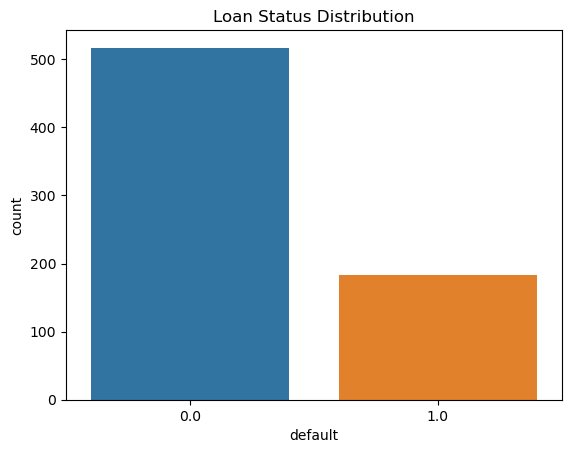

In [97]:
# Plot target distribution
sns.countplot(x='default', data=df)
plt.title('Loan Status Distribution')
plt.show()

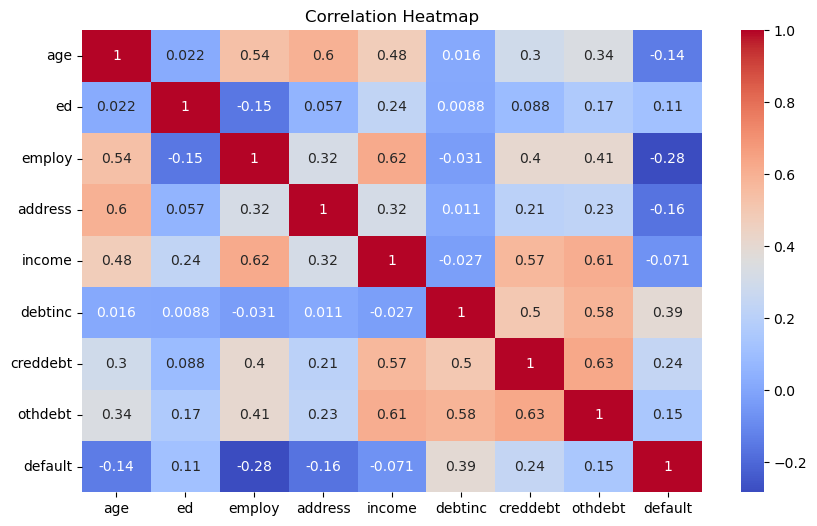

In [98]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='age', ylabel='income'>

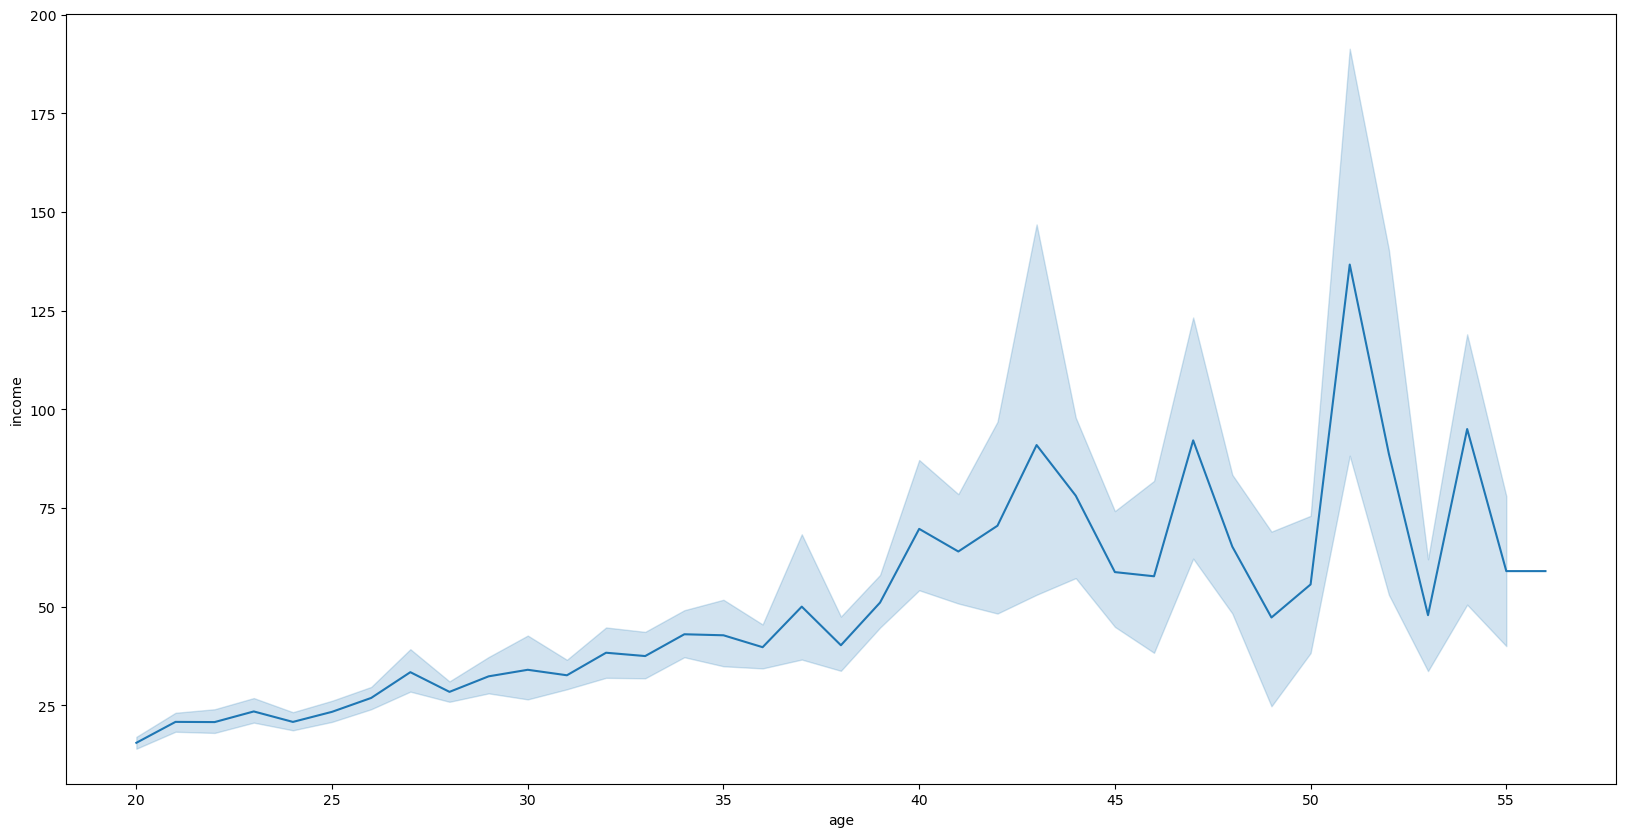

In [99]:
#Plot customer age against their income 
fig,ax = plt.subplots(figsize = (20,10))
sns.lineplot(x='age', y='income', data=df, ax=ax)

<Axes: xlabel='age', ylabel='debtinc'>

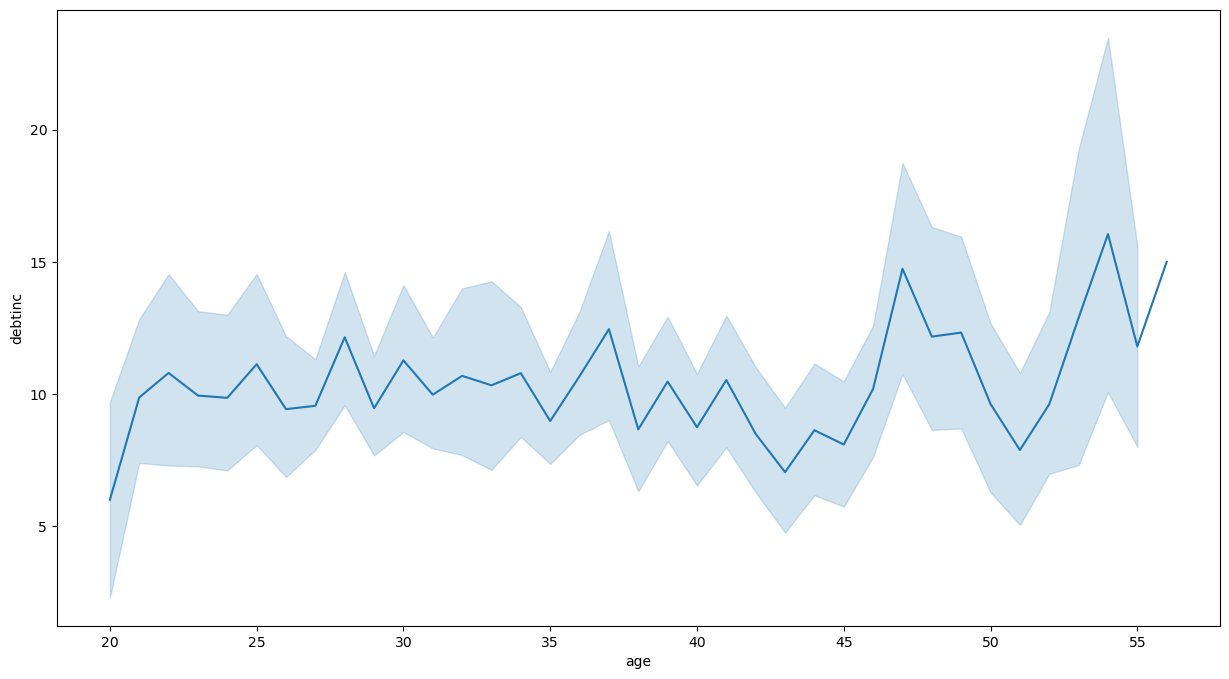

In [100]:
#Customer age againist their debtinc
fig,ax = plt.subplots(figsize = (15,8))
sns.lineplot(x='age', y='debtinc', data=df, ax=ax)

In [101]:
#Number of defaults and non defaults
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [102]:
#Prepare x and y values
x = df[['income', 'age', 'employ', 'debtinc']]
y = df['default']

#age  ed  employ  address  income  debtinc  creddebt  othdebt    default

In [103]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [104]:

xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

## Creating Model

### Random Forest

In [105]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(xtrain,ytrain)
y_pred_rf = rf.predict(xtest)
print("Random Forest Classification Report:")
print(classification_report(ytest, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       102
         1.0       0.61      0.29      0.39        38

    accuracy                           0.76       140
   macro avg       0.69      0.61      0.62       140
weighted avg       0.73      0.76      0.72       140



In [106]:
rf.score(xtest,ytest)

0.7571428571428571

In [107]:
rf2 = cross_val_score(estimator=rf,X=xtrain,y=ytrain,cv=10)
rf2.mean()

0.7607142857142857

### Support Vector Machine (SVM)

In [108]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [109]:
sv.score(xtest,ytest)

0.7785714285714286

In [110]:
sv2 = cross_val_score(estimator=sv,X=xtrain,y=ytrain,cv=10)
sv2.mean()

0.7642857142857142

### Using gridsearch for best parameters

In [111]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [112]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [113]:
model.best_params_

{'C': 1.2, 'gamma': 0.4, 'kernel': 'rbf'}

In [114]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.7642857142857142

### Logistic Regression

In [115]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

In [116]:
y_pred_lr = lr.predict(xtest)
print("Logistic Regression Report:")
print(classification_report(ytest, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90       102
         1.0       0.89      0.45      0.60        38

    accuracy                           0.84       140
   macro avg       0.86      0.71      0.75       140
weighted avg       0.84      0.84      0.82       140



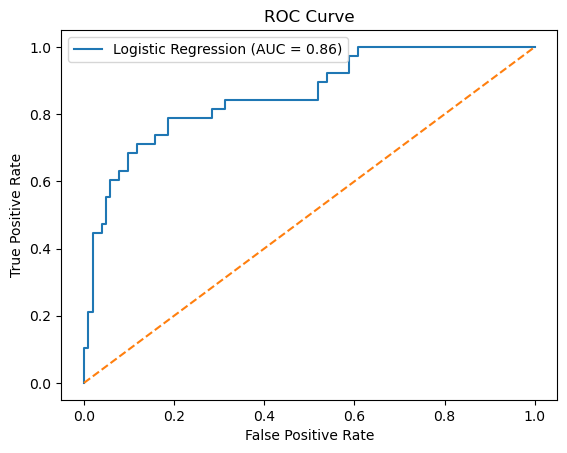

In [117]:
# ROC Curve for Logistic Regression
y_prob_rf = lr.predict_proba(xtest)[:,1]
fpr, tpr, _ = roc_curve(ytest, y_prob_rf)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(ytest, y_prob_rf)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Confusion Matrix

<Axes: >

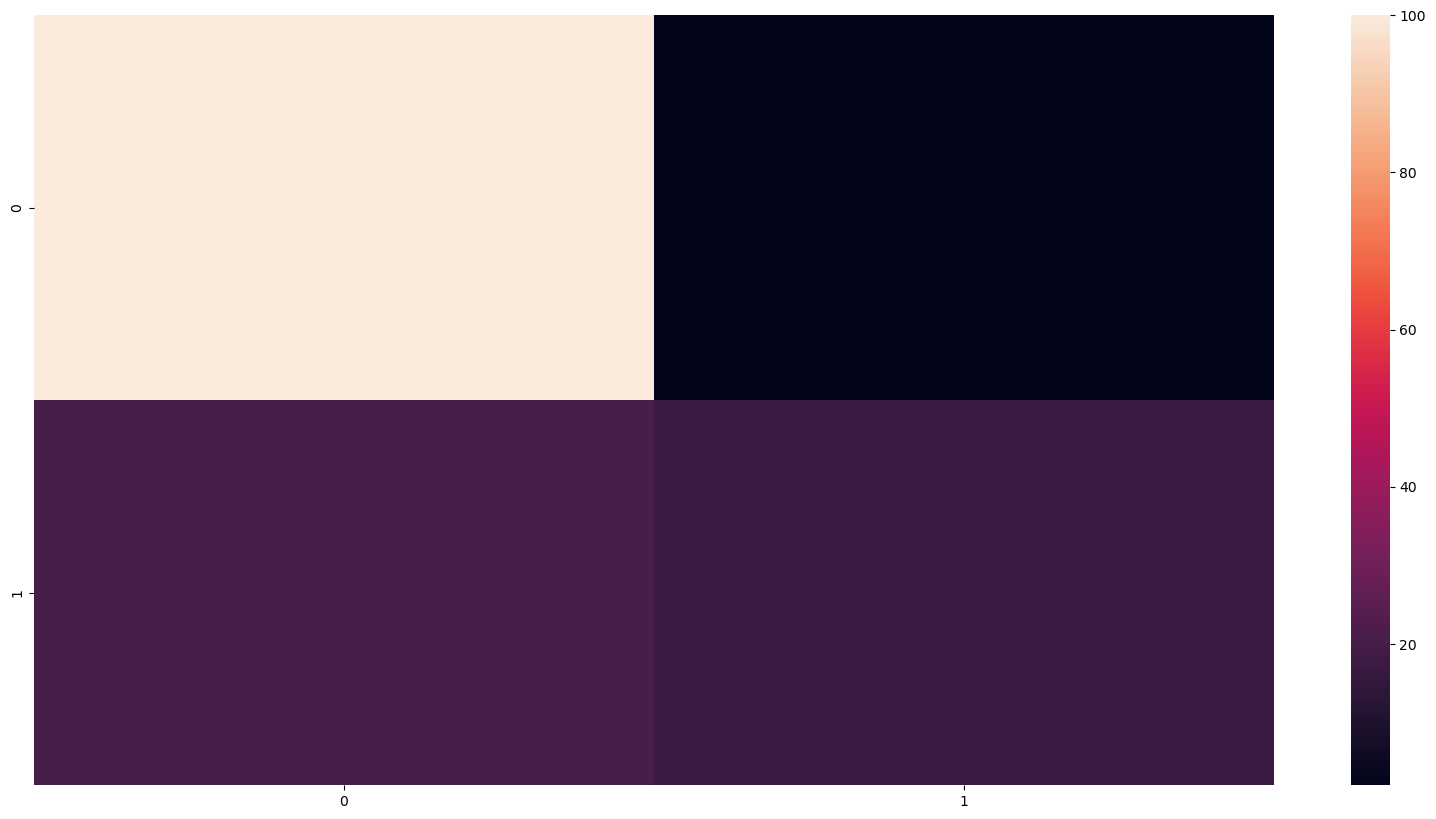

In [118]:
y_pred = lr.predict(xtest)
c= confusion_matrix(ytest,y_pred)
fig ,ax = plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)

In [119]:
# Save the model
joblib.dump(lr, 'credit_risk_model.pkl')

['credit_risk_model.pkl']